In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [7]:
import pandas as pd

# convert the data below into pandas dataset 
# the 2 lowest frequecie are called M1 and M2
# the otehr ones are S1, S2, S3, S4, S5, S6, S7, S8, S9, S10 ...
frequencies = [4.808978,
    5.020052,
    5.1920692,
    5.360086,
    5.5001,
    5.680118,
    5.8441344,
    6.0241524,
    6.1841684,
    6.3641864,
    6.55796,
    6.7549,
    6.96799,
    
]

# Sort frequencies to identify the two lowest
sorted_freq = sorted(frequencies)
labels = ['M1', 'M2'] + [f'S{i}' for i in range(1, len(frequencies)-1)]

# Assign labels based on sorted order
freq_label_pairs = sorted(zip(sorted_freq, labels), key=lambda x: frequencies.index(x[0]))
ordered_labels = [label for _, label in freq_label_pairs]

df = pd.DataFrame({'Label': ordered_labels, 'Frequency': frequencies})
print(df)



   Label  Frequency
0     M1   4.808978
1     M2   5.020052
2     S1   5.192069
3     S2   5.360086
4     S3   5.500100
5     S4   5.680118
6     S5   5.844134
7     S6   6.024152
8     S7   6.184168
9     S8   6.364186
10    S9   6.557960
11   S10   6.754900
12   S11   6.967990


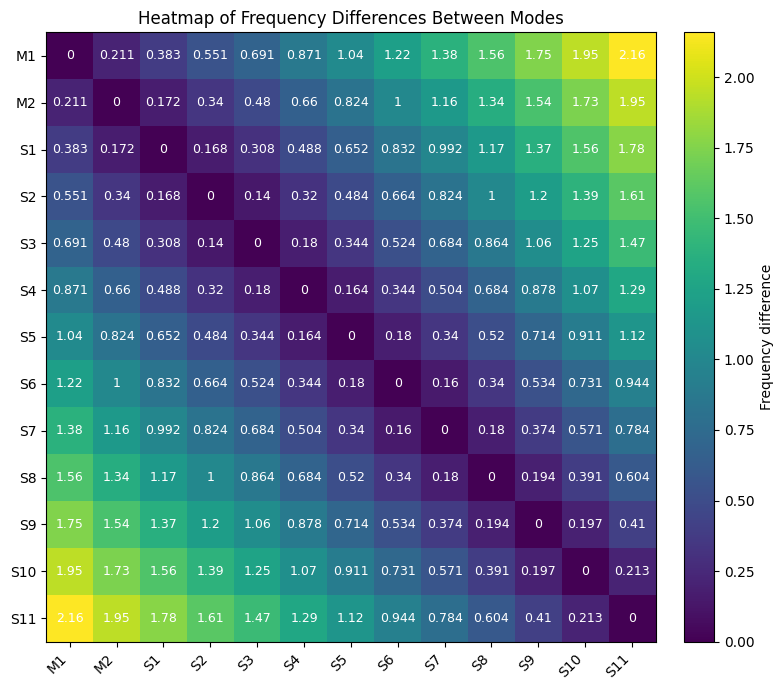

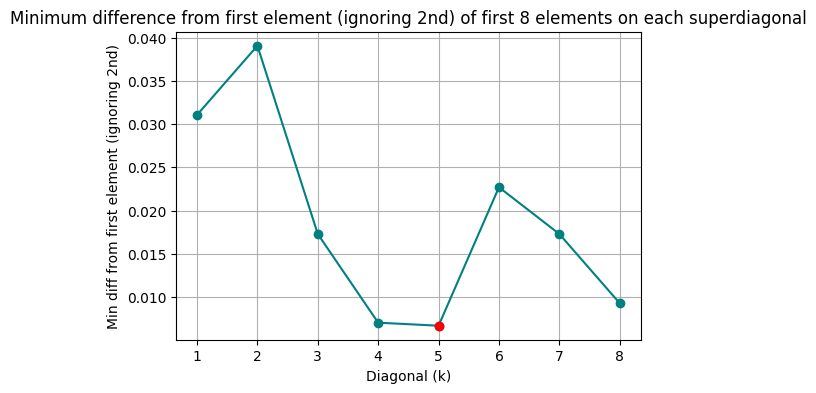

Minimum difference from first element (ignoring 2nd) among first 8 elements of each superdiagonal:
Diagonal k=1: min diff from first = 0.0311
Diagonal k=2: min diff from first = 0.0391
Diagonal k=3: min diff from first = 0.0173
Diagonal k=4: min diff from first = 0.00705
Diagonal k=5: min diff from first = 0.0067
Diagonal k=6: min diff from first = 0.0227
Diagonal k=7: min diff from first = 0.0173
Diagonal k=8: min diff from first = 0.0093

Minimum occurs between modes: M1 and S4 (diff = 0.0067)


In [35]:


# create a heatmap with mode labels on both x and y axes. The colorbar should insidcate the frequency difference
# on the heatmap squares makr sure to label the exact frequency difference up to 3 sig figs 
# Compute the frequency difference matrix
freqs = df['Frequency'].values
n = len(freqs)
diff_matrix = np.abs(freqs.reshape(-1, 1) - freqs.reshape(1, -1))

fig, ax = plt.subplots(figsize=(8, 7))
im = ax.imshow(diff_matrix, cmap='viridis')

# Set axis labels
ax.set_xticks(np.arange(n))
ax.set_yticks(np.arange(n))
ax.set_xticklabels(df['Label'], rotation=45, ha='right')
ax.set_yticklabels(df['Label'])

# Annotate each cell with the frequency difference (3 sig figs)
for i in range(n):
    for j in range(n):
        text = f"{diff_matrix[i, j]:.3g}"
        ax.text(j, i, text, ha="center", va="center", color="w" if diff_matrix[i, j] > diff_matrix.max()/2 else "white", fontsize=9)

# Add colorbar
cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Frequency difference')

ax.set_title("Heatmap of Frequency Differences Between Modes")
plt.tight_layout()
plt.show()

# along each doagonal of the heatmap, i want to calculat ethe difference among  the elermnets of the diagonal and plot the minimum (make sure the minimum includes M1)
# as in i want to find the minimum difference of elements from the first element of each diagonal. 
# so the quantities (minimum difference from first and minimum difference among elements) should be plotted for each diagona

# go only up to some specified N elements on the diagonal, say N = 7
# Optionally ignore the second element (index 1) of each diagonal before calculating differences

# Calculate the minimum difference from the first element of each diagonal (including M1)
# Only consider up to N elements on each diagonal, optionally ignore the second element

def min_diff_from_first_on_diagonals(diff_matrix, N, ignore_second=False):
    min_diffs = []
    for k in range(1, N + 1):
        diag = np.diag(diff_matrix, k=k)
        diag = diag[:N]  # Only consider up to N elements
        if len(diag) < 2:
            min_diffs.append(np.nan)
            continue
        # Optionally ignore the second element (index 1)
        indices = [i for i in range(len(diag)) if not (ignore_second and i == 1)]
        # Compute differences from the first element (index 0)
        diffs = [abs(diag[i] - diag[0]) for i in indices[1:]]  # skip first element itself
        if diffs:
            min_diffs.append(np.min(diffs))
        else:
            min_diffs.append(np.nan)
    return min_diffs
# Calculate minimum difference from first element for each diagonal and annotate the minimum point
min_diffs_from_first = min_diff_from_first_on_diagonals(diff_matrix, N, ignore_second=ignore_second)

# Find the diagonal and index where the minimum occurs
min_val = np.nanmin(min_diffs_from_first)
min_diag_idx = np.nanargmin(min_diffs_from_first) + 1  # diagonals start at k=1

# # Find which pair of modes this corresponds to
# i = 0  # always compare to the first element of the diagonal
# j = min_diag_idx  # superdiagonal offset
# row = i
# col = i + j
# if ignore_second:
#     # If ignoring second element, need to check which element actually gave the min
#     diag = np.diag(diff_matrix, k=min_diag_idx)[:N]
#     indices = [idx for idx in range(len(diag)) if idx != 1]
#     diffs = [abs(diag[idx] - diag[0]) for idx in indices[1:]]
#     min_diff_idx = np.nanargmin(diffs) + 2  # +2 because indices[1:] skips first and possibly second
#     col = i + min_diff_idx

# mode1 = df['Label'].iloc[row]
# mode2 = df['Label'].iloc[col]

plt.figure(figsize=(6, 4))
plt.plot(range(1, N + 1), min_diffs_from_first, marker='o', color='teal')
plt.scatter(min_diag_idx, min_val, color='red', zorder=5)
# plt.annotate(f"Min: {min_val:.3g}\n({mode1}, {mode2})", 
#              (min_diag_idx, min_val), 
#              textcoords="offset points", xytext=(10, -15), ha='left', color='red', fontsize=10,
#              arrowprops=dict(arrowstyle="->", color='red'))
plt.xlabel('Diagonal (k)')
plt.ylabel('Min diff from first element' + (' (ignoring 2nd)' if ignore_second else ''))
plt.title(f"Minimum difference from first element{' (ignoring 2nd)' if ignore_second else ''} of first {N} elements on each superdiagonal")
plt.grid(True)
plt.show()

print(f"Minimum difference from first element{' (ignoring 2nd)' if ignore_second else ''} among first {N} elements of each superdiagonal:")
for k, val in enumerate(min_diffs_from_first, 1):
    print(f"Diagonal k={k}: min diff from first = {val:.3g}")
print(f"\nMinimum occurs between modes: {mode1} and {mode2} (diff = {min_val:.3g})")

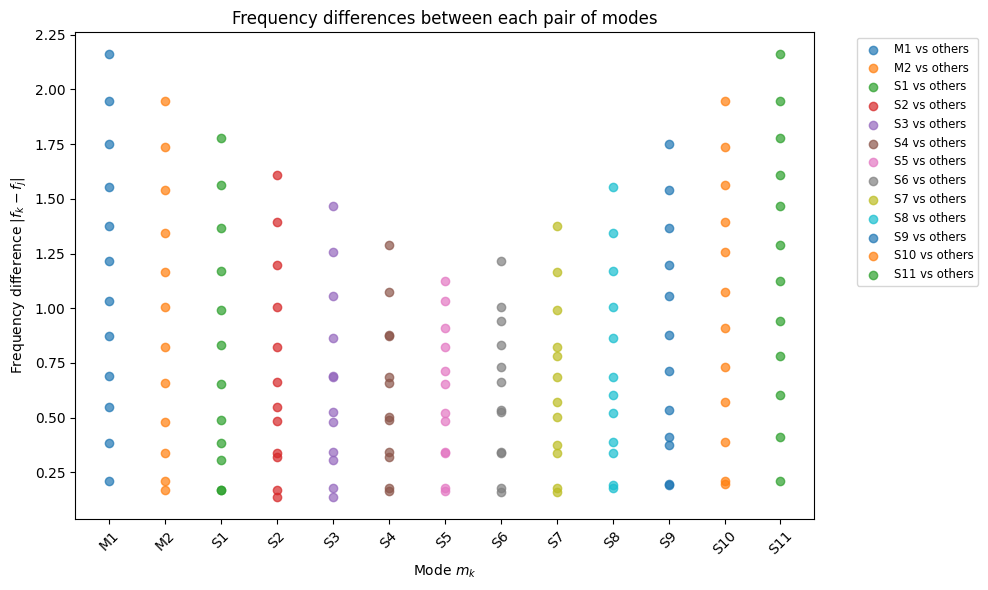

In [ ]:
from itertools import combinations

# Plot the energy differences between each pair of modes 
# on uy axis is frequency difference and on x axis you have mode labels -- call them m_k. 
# at each m_k, vertially plot the frequency difference between m_K and mj and label them on legend by m_j 



fig, ax = plt.subplots(figsize=(10, 6))

# For each mode k, plot vertical lines for all diffs to other modes j
for k, (label_k, freq_k) in enumerate(zip(ordered_labels, frequencies)):
    diffs = []
    labels_j = []
    for j, (label_j, freq_j) in enumerate(zip(ordered_labels, frequencies)):
        if k != j:
            diffs.append(abs(freq_k - freq_j))
            labels_j.append(label_j)
    y = diffs
    x = [k] * len(y)
    ax.scatter(x, y, label=f"{label_k} vs others", alpha=0.7)

ax.set_xticks(range(len(ordered_labels)))
ax.set_xticklabels(ordered_labels, rotation=45)
ax.set_xlabel("Mode $m_k$")
ax.set_ylabel("Frequency difference |$f_k - f_j$|")
ax.set_title("Frequency differences between each pair of modes")
ax.legend(fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [17]:
import pandas as pd

# convert below into a nother dataset, only take the first and third columns which ocntain frequencies 
# Extract the first and third columns (frequencies) from the text
# Relabel Buffer 1 to M1, Buffer 2 to B2, Storage 1 to S1, Storage 2 to S2, etc.
data = [
    ("M1", 4.984),
    ("M2", 5.158),
    ("S1", 5.333),
    ("S2", 5.505),
    ("S3", 5.681),
    ("S4", 5.860),
    ("S5", 6.037),
    ("S6", 6.229),
    ("S7", 6.407),
]
df2 = pd.DataFrame(data, columns=['Label', 'Frequency'])
print(df2)

  Label  Frequency
0    M1      4.984
1    M2      5.158
2    S1      5.333
3    S2      5.505
4    S3      5.681
5    S4      5.860
6    S5      6.037
7    S6      6.229
8    S7      6.407


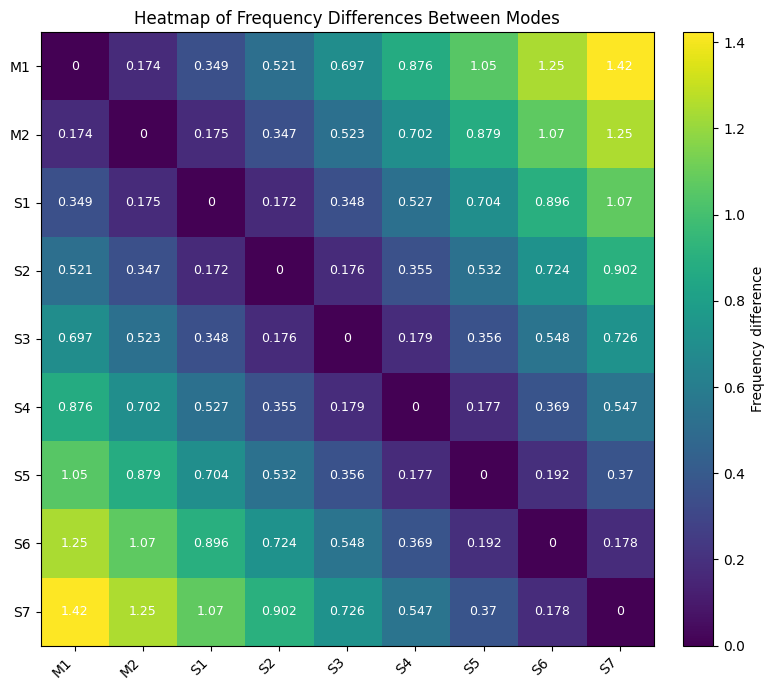

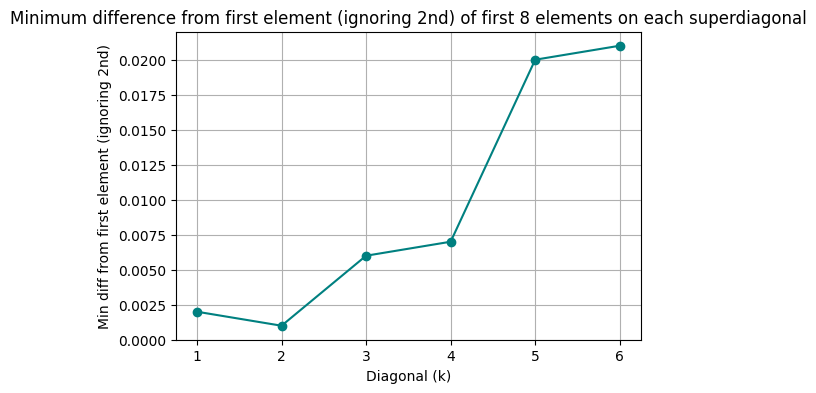

Minimum difference from first element (ignoring 2nd) among first 8 elements of each superdiagonal:
Diagonal k=1: min diff from first = 0.002
Diagonal k=1: min diff among elements = 0.002
Diagonal k=2: min diff from first = 0.001
Diagonal k=2: min diff among elements = 0.001
Diagonal k=3: min diff from first = 0.006
Diagonal k=3: min diff among elements = 0.006
Diagonal k=4: min diff from first = 0.007
Diagonal k=4: min diff among elements = 0.007
Diagonal k=5: min diff from first = 0.02
Diagonal k=5: min diff among elements = 0.02
Diagonal k=6: min diff from first = 0.021
Diagonal k=6: min diff among elements = 0.021
Diagonal k=7: min diff from first = nan
Diagonal k=7: min diff among elements = nan
Diagonal k=8: min diff from first = nan
Diagonal k=8: min diff among elements = nan


In [30]:
# create a heatmap with mode labels on both x and y axes. The colorbar should insidcate the frequency difference
# on the heatmap squares makr sure to label the exact frequency difference up to 3 sig figs 



# Compute the frequency difference matrix
freqs = df2['Frequency'].values
n = len(freqs)
diff_matrix = np.abs(freqs.reshape(-1, 1) - freqs.reshape(1, -1))

fig, ax = plt.subplots(figsize=(8, 7))
im = ax.imshow(diff_matrix, cmap='viridis')

# Set axis labels
ax.set_xticks(np.arange(n))
ax.set_yticks(np.arange(n))
ax.set_xticklabels(df2['Label'], rotation=45, ha='right')
ax.set_yticklabels(df2['Label'])

# Annotate each cell with the frequency difference (3 sig figs)
for i in range(n):
    for j in range(n):
        text = f"{diff_matrix[i, j]:.3g}"
        ax.text(j, i, text, ha="center", va="center", color="w" if diff_matrix[i, j] > diff_matrix.max()/2 else "white", fontsize=9)

# Add colorbar
cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Frequency difference')

ax.set_title("Heatmap of Frequency Differences Between Modes")
plt.tight_layout()
plt.show()

def min_diff_from_first_on_diagonals(diff_matrix, N, ignore_second=False):
    min_diffs = []
    for k in range(1, N + 1):
        diag = np.diag(diff_matrix, k=k)
        diag = diag[:N]  # Only consider up to N elements
        if len(diag) < 2:
            min_diffs.append(np.nan)
            continue
        # Optionally ignore the second element (index 1)
        indices = [i for i in range(len(diag)) if not (ignore_second and i == 1)]
        # Compute differences from the first element (index 0)
        diffs = [abs(diag[i] - diag[0]) for i in indices[1:]]  # skip first element itself
        if diffs:
            min_diffs.append(np.min(diffs))
        else:
            min_diffs.append(np.nan)
    return min_diffs

min_diffs_from_first = min_diff_from_first_on_diagonals(diff_matrix, N, ignore_second=ignore_second)


plt.figure(figsize=(6, 4))
plt.plot(range(1, N + 1), min_diffs_from_first, marker='o', color='teal')
plt.xlabel('Diagonal (k)')
plt.ylabel('Min diff from first element' + (' (ignoring 2nd)' if ignore_second else ''))
plt.title(f"Minimum difference from first element{' (ignoring 2nd)' if ignore_second else ''} of first {N} elements on each superdiagonal")
plt.grid(True)
plt.show()

print(f"Minimum difference from first element{' (ignoring 2nd)' if ignore_second else ''} among first {N} elements of each superdiagonal:")
for k, val in enumerate(min_diffs_from_first, 1):
    print(f"Diagonal k={k}: min diff from first = {val:.3g}")
    print(f"Diagonal k={k}: min diff among elements = {val:.3g}")

